In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# root of the original data
root = "../../data/raw_data"
dst = "../../data/pre_processed"

In [3]:
org_dir_list = os.listdir(root)
year_list = list(range(1983, 2021, 1))

In [4]:
availability_mask = {}

for dir in org_dir_list:
    dir_path = os.path.join(root, dir)
    exist_years = sorted(set(int(file[:4]) for file in os.listdir(dir_path)))
    mask = [1 if year in exist_years else 0 for year in year_list]

    availability_mask[dir] = mask

In [5]:
year_availability = pd.DataFrame(availability_mask, index=year_list).T

In [6]:
year_availability

,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
10001,1,0,0,1,1,0,0,0,1,1,...,1,1,1,1,1,0,1,1,1,1
10002,0,1,0,1,1,0,0,0,1,1,...,1,1,1,1,1,0,1,1,1,1
10003,0,1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,0,1,1,1,1
10004,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
10005,0,1,0,1,1,1,1,1,1,1,...,0,0,1,0,1,1,1,0,1,1
10006,0,1,1,0,1,1,0,1,1,1,...,0,0,1,1,1,1,1,1,1,1
10007,0,1,0,0,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
10008,0,1,1,0,1,1,0,1,1,1,...,0,0,0,1,1,1,1,0,1,1
10009,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,1,1
10010,0,0,1,0,0,1,0,0,1,0,...,1,0,1,1,1,1,1,1,1,1


In [7]:
year_counts = (pd.DataFrame(year_availability.sum(), columns=['count'])
               .sort_values(by='count', ascending=False))
year_counts

,count
2017,50
2020,49
2019,48
2014,48
2016,45
2015,45
2018,42
2000,41
1998,40
2001,39


In [33]:
years_selected = year_counts[year_counts > 35].dropna().index
years_selected

Index([2017, 2020, 2019, 2014, 2016, 2015, 2018, 2000, 1998, 2001, 1995, 1999,
       2010],
      dtype='int64')

In [34]:
year_availability[years_selected.sort_values()]

,1995,1998,1999,2000,2001,2010,2014,2015,2016,2017,2018,2019,2020
10001,0,1,1,1,1,1,1,1,0,1,1,1,1
10002,0,1,0,1,1,1,1,1,0,1,1,1,1
10003,1,1,1,1,1,1,1,1,0,1,1,1,1
10004,1,1,1,1,0,1,1,1,1,1,1,1,1
10005,1,1,1,1,1,1,0,1,1,1,0,1,1
10006,1,1,0,1,0,1,1,1,1,1,1,1,1
10007,1,0,1,1,1,1,1,1,1,1,1,1,1
10008,1,1,1,1,1,1,1,1,1,1,0,1,1
10009,0,0,1,1,1,0,1,0,1,1,0,1,1
10010,1,1,1,1,1,0,1,1,1,1,1,1,1


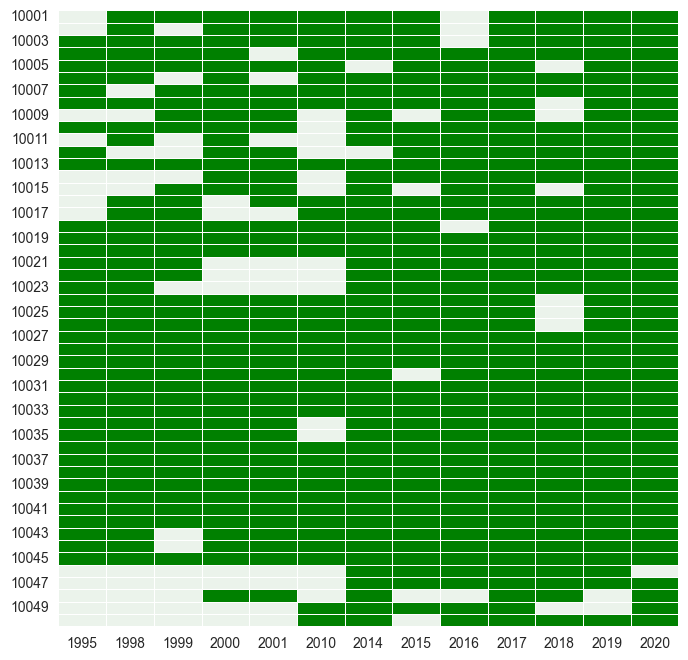

In [35]:
plt.figure(figsize=[8, 8], dpi=100)
sns.heatmap(year_availability[years_selected.sort_values()], 
            cmap=sns.light_palette('green'),
            linewidth=.7,
            cbar=False)
plt.show()